In [7]:
import numpy as np


class SimplePerceptron(object):
    '''
    単純パーセプトロン
    '''
    def __init__(self, input_dim):
        self.input_dim = input_dim
        self.w = np.random.normal(size = (input_dim, ))
        self.b = 0.
    
    def forward(self, x):
        y = step(np.matmul(self.w, x) + self.b)
        return y
    
    def compute_deltas(self, x, t):
        y = self.forward(x)
        delta = y - t
        dw = delta * x
        db = delta
        return dw, db
    
    
    
def step(x):
    return 1 * (x > 0)
    
    
if __name__ == '__main__':
    
    '''
    1. データの準備
    '''
    d = 2 # 入力次元
    N = 20 # 全データ数
    
    mean = 5
    
    x1 = np.random.randn(N//2, d) + np.array([0, 0])
    x2 = np.random.randn(N//2, d) + np.array([mean, mean])
    
    t1 = np.zeros(N//2)
    t2 = np.ones(N//2)
    
    x = np.concatenate((x1, x2), axis=0)
    t = np.concatenate((t1, t2))
    
    
    '''
    2. モデルの構築
    '''
    model = SimplePerceptron(input_dim = d)
    
    
    '''
    3. モデルの学習
    '''
    def compute_loss(dw, db):
        return all(dw == 0) * (db == 0)
    
    def train_step(x, t):
        dw, db = model.compute_deltas(x, t)
        loss = compute_loss(dw, db)
        model.w = model.w - dw
        model.b = model.b - db
        return loss
    
    while True:
        classified = True
        for i in range(N):
            loss = train_step(x[i], t[i])
            classified *= loss
        if classified:
            break
    
    '''
    4. モデルの評価
    '''
    print('w: ', model.w)
    print('b: ', model.b)
    
    

w:  [2.30826805 3.32245598]
b:  -4.0


In [8]:
print('(0, 0) =>', model.forward([0, 0]))
print('(5, 5) =>', model.forward([5, 5]))

(0, 0) => 0
(5, 5) => 1


[[ 0.58334992 -0.14564535]
 [ 0.98174735 -0.20106524]
 [-1.72185655  0.43029745]
 [ 0.48905859 -0.5539163 ]
 [-0.60050523  0.63806785]
 [-0.99950328  0.73225372]
 [-0.53430523 -0.90635034]
 [ 0.57436162 -0.07795496]
 [-0.31341198  1.20874051]
 [-0.08622735 -1.50749532]]
[ 0.58334992  0.98174735 -1.72185655  0.48905859 -0.60050523 -0.99950328
 -0.53430523  0.57436162 -0.31341198 -0.08622735  2.32888191  4.908687
  3.78072255  4.74655235  2.73095455  3.97573664  5.13188411  6.27345265
  3.92705428  5.61508493]
[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10]


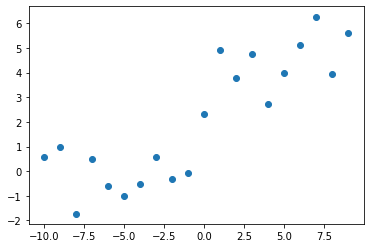

In [28]:
import matplotlib.pyplot as plt

print(x1)
print(np.concatenate([x1, x2])[:, 0])
print(np.arange(-10, 11))
plt.scatter(np.arange(-10, 10), np.concatenate([x1, x2])[:, 0])
plt.show()


